In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("final_df_no_patents.csv")

In [21]:
df

,area,year,gdp,r_d,researchers,human_development_index_(hdi),public_expenditure_education,rd_to_gdp_ratio
0,Angola,2016,52761617226,0.0,18.8,0.596,2.8,0.000000e+00
1,Azerbaijan,2021,54825411765,0.2,1741.1,0.745,3.5,3.647943e-12
2,Argentina,2005,198737000000,0.4,819.4,0.802,3.9,2.012710e-12
3,Argentina,2010,423627000000,0.6,1123.8,0.834,5.0,1.416340e-12
4,Argentina,2015,594749000000,0.6,1230.5,0.848,5.8,1.008829e-12
...,...,...,...,...,...,...,...,...
205,Tanzania,2010,32012892919,0.4,36.1,0.493,4.5,1.249497e-11
206,Uruguay,2015,57680327999,0.4,677.0,0.811,4.6,6.934773e-12
207,Uruguay,2020,53668636568,0.4,795.7,0.821,4.6,7.453143e-12
208,Uzbekistan,2015,86196264755,0.2,497.4,0.701,5.5,2.320286e-12


In [3]:
european_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 
    'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 
    'Lithuania', 'Luxembourg', 'Malta', 'Norway', 'Poland', 'Portugal', 
    'Romania', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
    'Ukraine', 'United Kingdom'
]

all_countries = [
    'Angola', 'Azerbaijan', 'Argentina', 'Australia', 'Austria',
    'Belgium', 'Brazil', 'Bulgaria', 'Burundi', 'Belarus', 'Cambodia',
    'Canada', 'Sri Lanka', 'Chile', 'China', 'Colombia',
    'Democratic Republic of the Congo', 'Costa Rica', 'Croatia',
    'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'El Salvador',
    'Ethiopia', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
    'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
    'Iceland', 'India', 'Iran', 'Ireland', 'Italy', 'Japan',
    'Kazakhstan', 'Kenya', 'South Korea', 'Kuwait', 'Lesotho',
    'Latvia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia',
    'Mali', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mozambique',
    'Namibia', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan',
    'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Romania',
    'Russia', 'Senegal', 'Serbia', 'Singapore', 'Viet Nam', 'Slovenia',
    'South Africa', 'Spain', 'Eswatini', 'Sweden', 'Switzerland',
    'Thailand', 'Togo', 'United Arab Emirates', 'Tunisia', 'Uganda',
    'Ukraine', 'Egypt', 'United Kingdom', 'Tanzania', 'Uruguay',
    'Uzbekistan'
]

In [4]:
df['rd_to_gdp_ratio'] = df['r_d'] / df['gdp']

In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
problematic_rows = df[df['rd_to_gdp_ratio'].isna()]
print("\nRows with NaN values in 'rd_to_gdp_ratio':")
print(problematic_rows)


Rows with NaN values in 'rd_to_gdp_ratio':
Empty DataFrame
Columns: [Unnamed: 0, area, year, gdp, r_d, researchers, human_development_index_(hdi), public_expenditure_education, rd_to_gdp_ratio]
Index: []


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
european_df = df[df['area'].isin(european_countries)]
non_european_df = df[df['area'].isin(all_countries) & ~df['area'].isin(european_countries)]

In [10]:
european_df_clean = european_df.dropna(subset=['rd_to_gdp_ratio'])
non_european_df_clean = non_european_df.dropna(subset=['rd_to_gdp_ratio'])

In [11]:
european_stats = european_df_clean['rd_to_gdp_ratio'].describe()
non_european_stats = non_european_df_clean['rd_to_gdp_ratio'].describe()

print("\nEuropean Countries Stats:")
print(european_stats)

print("\nNon-European Countries Stats:")
print(non_european_stats)


European Countries Stats:
count    9.100000e+01
mean     1.719086e-11
std      2.635870e-11
min      5.381494e-13
25%      3.377330e-12
50%      7.592726e-12
75%      1.873682e-11
max      1.602092e-10
Name: rd_to_gdp_ratio, dtype: float64

Non-European Countries Stats:
count    1.190000e+02
mean     1.001085e-11
std      1.871514e-11
min      0.000000e+00
25%      1.081350e-12
50%      2.585767e-12
75%      9.802941e-12
max      1.338534e-10
Name: rd_to_gdp_ratio, dtype: float64


In [15]:
import seaborn as sns

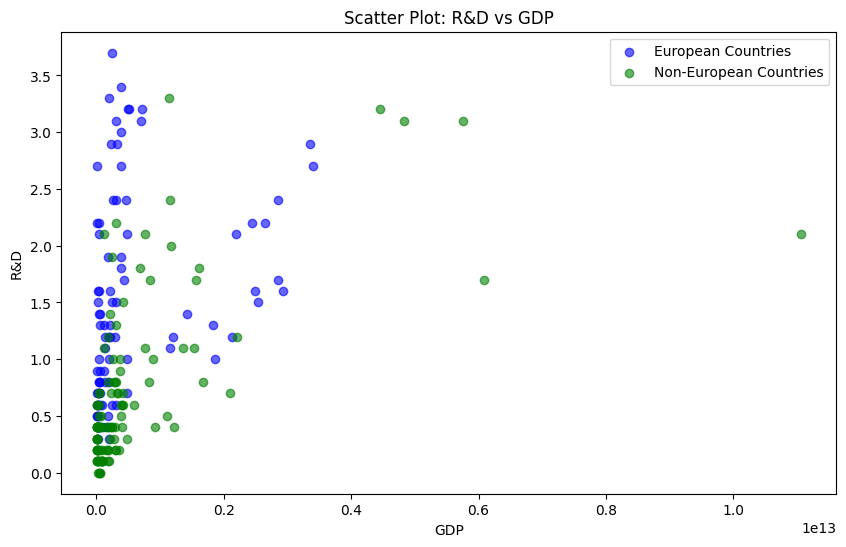

In [18]:
# Plot R&D vs GDP as a scatter plot, colored by region
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(european_df_clean['gdp'], european_df_clean['r_d'], label='European Countries', color='b', alpha=0.6)
plt.scatter(non_european_df_clean['gdp'], non_european_df_clean['r_d'], label='Non-European Countries', color='g', alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot: R&D vs GDP')
plt.xlabel('GDP')
plt.ylabel('R&D')

# Show legend
plt.legend()

# Show plot
plt.show()

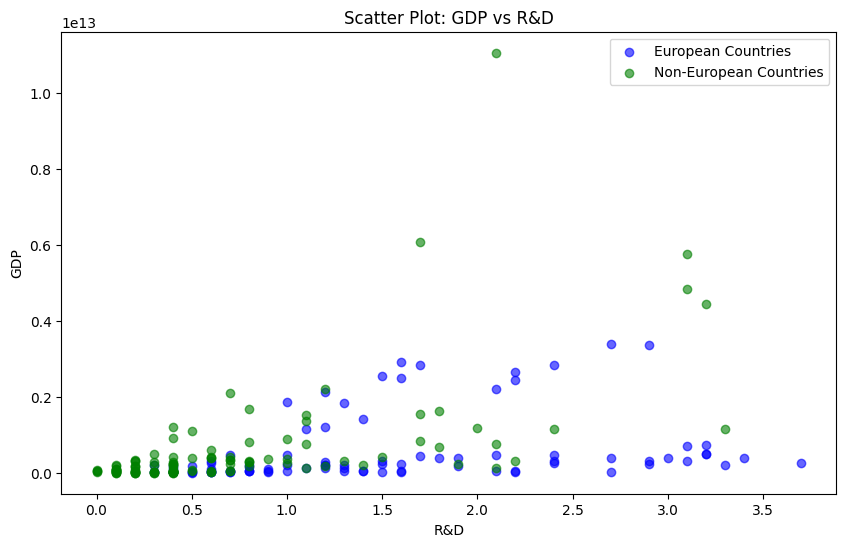

In [24]:
# Plot R&D vs GDP as a scatter plot, colored by region
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(european_df_clean['r_d'], european_df_clean['gdp'], label='European Countries', color='b', alpha=0.6)
plt.scatter(non_european_df_clean['r_d'], non_european_df_clean['gdp'], label='Non-European Countries', color='g', alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot: GDP vs R&D')
plt.xlabel('R&D')
plt.ylabel('GDP')

# Show legend
plt.legend()

# Show plot
plt.show()

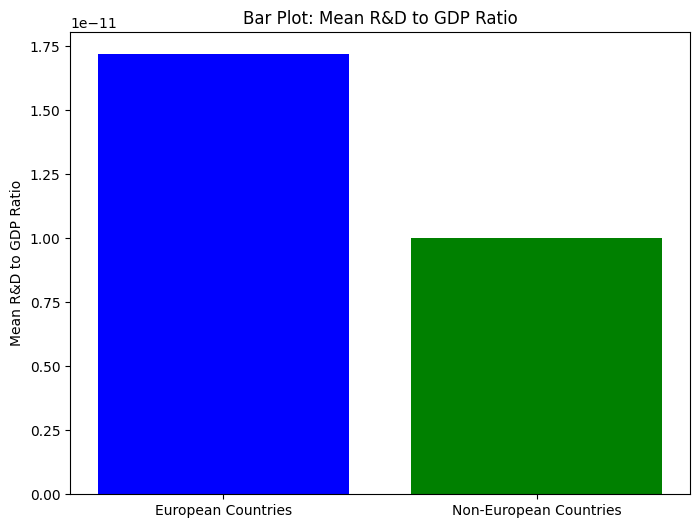

In [19]:
# Calculate the mean R&D to GDP ratio for both groups
mean_european = european_df_clean['rd_to_gdp_ratio'].mean()
mean_non_european = non_european_df_clean['rd_to_gdp_ratio'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['European Countries', 'Non-European Countries'], [mean_european, mean_non_european], color=['blue', 'green'])

# Add titles and labels
plt.title('Bar Plot: Mean R&D to GDP Ratio')
plt.ylabel('Mean R&D to GDP Ratio')

# Show plot
plt.show()


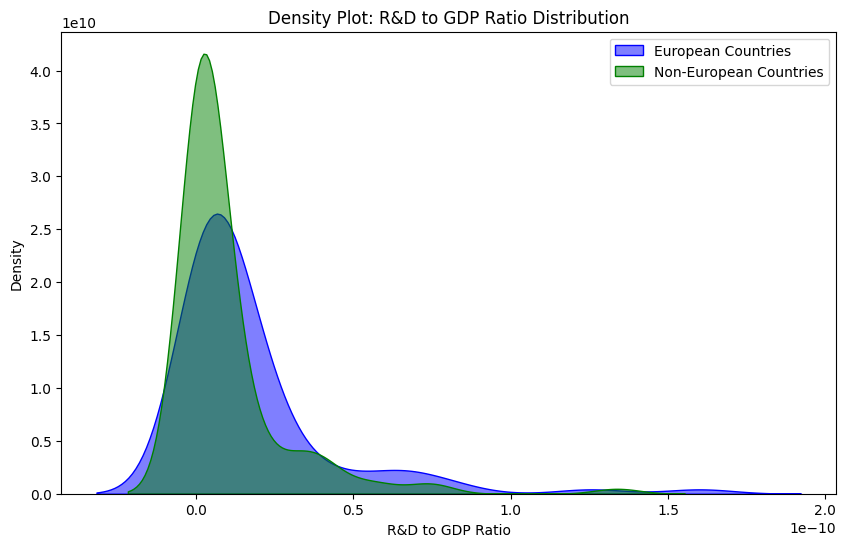

In [20]:
# Plot KDE for European and Non-European countries
plt.figure(figsize=(10, 6))

# KDE plots
sns.kdeplot(european_df_clean['rd_to_gdp_ratio'], label='European Countries', color='blue', fill=True, alpha=0.5)
sns.kdeplot(non_european_df_clean['rd_to_gdp_ratio'], label='Non-European Countries', color='green', fill=True, alpha=0.5)

# Add titles and labels
plt.title('Density Plot: R&D to GDP Ratio Distribution')
plt.xlabel('R&D to GDP Ratio')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()
